## Recap: Bayesian Linear Regression
### Straight Line Hypotheses
In this notebook, we are going to visualize Bayesian Linear Regression (BLR). To this end, we choose a very simple setting, namely a **one-dimensional** input space, i.e., $x \in \mathbb R$, and a **two-dimensional** weight space, i.e., $\boldsymbol{w} \in \mathbb R^2$, with polynomial features, i.e., the feature vector for an input $x$ reads:
$$
\boldsymbol{\phi}(x) = \begin{pmatrix}1, x \end{pmatrix}^T.
$$
This means that the model hypotheses are straight lines. 

### Bayesian Learning
As we did in the lecture, we assume i.i.d. Gaussian noise with standard deviation $\sigma_y$, i.e., the **likelihood function** for a single data tuple $(x, y)$ reads
$$
p(y | x, \boldsymbol{w}) = \mathcal N (y | \boldsymbol{\phi}(x)^T \boldsymbol{w}, \sigma_y^2) = \mathcal N (y | w_0 + w_1 x, \sigma_y^2).
$$

The i.i.d. assumption implies that the likelihood function for $N$ data tuples factorizes, i.e.,
$$
p(y_{1:N} | x_{1:N}, \boldsymbol{w}) = \prod_{n=1}^N p(y_n | x_n, \boldsymbol{w}).
$$

We use a conjugate, i.e., **Gaussian prior distribution** of the form
$$
p(\boldsymbol{w}) = \mathcal N(\boldsymbol{w} | \boldsymbol{0}, \sigma_w^2 \boldsymbol{I}).
$$

In Bayesian Learning, we use the **posterior distribution** to make predictions. It is given by Bayes' theorem:
$$
p(\boldsymbol{w} | x_{1:N}, y_{1:N}) = \frac{p(y_{1:N} | x_{1:N}, \boldsymbol{w})p(\boldsymbol{w})}{\int p(y_{1:N} | x_{1:N}, \boldsymbol{w}) p(\boldsymbol{w}) \mathrm d{\boldsymbol{w}}} = \mathcal N (\boldsymbol{w} | \boldsymbol{\mu}_N, \boldsymbol{\Sigma}_N).
$$
In the lecture, we derived the analytic expressions for the posterior mean $\boldsymbol{\mu}_N$ and covariance $\boldsymbol{\Sigma}_N$.

The **predictive distribution** at a query input $x^*$ is then defined as the following Bayesian model average:
$$
p(y^* | x^*, x_{1:N}, y_{1:N}) = \int p(y^* | x^*, \boldsymbol{w})p(\boldsymbol{w} | x_{1:N}, y_{1:N}) \mathrm d \boldsymbol{w} = \mathcal N(y^* | \mu(x^*), \sigma^2(x^*)).
$$
In the lecture, we also studied the analytic expressions for the predictive mean $\mu(x^*)$ and variance $\sigma^2(x^*)$.

### The Sequential Nature of Bayesian Learning
Note that we can also "read" the above expressions in a sequential manner. Indeed, it is easy to show that **the posterior, given $N-1$ data points, acts as the prior for the $N$-th datapoint**, i.e.,
$$
p(\boldsymbol{w} | x_{1:N}, y_{1:N}) = \frac{p(y_{N} | x_{N}, \boldsymbol{w})p(\boldsymbol{w} | y_{1:N-1}, x_{1:N-1})}{\int p(y_{N} | x_{N}, \boldsymbol{w})p(\boldsymbol{w} | y_{1:N-1}, x_{1:N-1}) \mathrm d \boldsymbol{w}}.
$$

## Visualize BLR
First, we are going to import a class which supports us with all the functionality we need to do BLR. You are going to implement all this in the homework exercises, so we won't have a look at it here.

In [1]:
from blr import BayesianLinearRegression

We also need functions to visualize the likelihood function, the posterior distribution, and the predictive distribution. Let's also import them.

In [2]:
from blr_vis import visualize_log_likelihood, visualize_log_posterior, visualize_predictive_distribution

Now, we generate our data. We assume a ground truth function with bias $w_{0, \mathrm{true}}$ and slope $w_{1, \mathrm{true}}$, and generate $N$ datapoints by adding i.i.d. Gaussian noise with noise standard deviation $\sigma_{y, \mathrm{true}}$.

In [3]:
import numpy as np
np.random.seed(125)

## generate data
# the ground truth weights
w0_true = -0.2
w1_true = 0.5
# the ground truth noise standard deviation
sigma_y_true = 0.1
# generate N=32 data tuples
N = 32
# the inputs
x = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
# the ground truth outputs
y = w0_true + w1_true * x
# add noise
y += sigma_y_true * np.random.randn(*x.shape)

Now we are ready to generate a BLR instance. We use a standard normal prior and the true noise standard deviation for the likelihood deviation.

In [4]:
# generate BLR model
blr = BayesianLinearRegression(
    sigma_w=1.0,  # the prior standard deviation
    sigma_y=sigma_y_true,   # the likelihood standard deviation
    d_w=2,  # the dimension of the weight vector, features are polynomial
)

Now, we are ready to visualize BLR. Let's first have a look at what kinds of plots we are going to look at. 

### Visualize the Predictive Distribution
Assume we have seen $n$ of our $N$ datapoints. We can visualize the predictive distribution by showing some sampled functions, i.e., sample weights $\boldsymbol{w}$ from the posterior and plot $\boldsymbol{w} \phi(x)^T$, together with the predictive mean and $95\,\%$ confidence intervals.

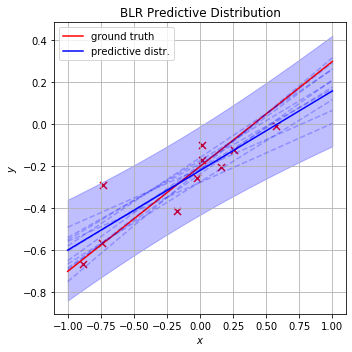

In [5]:
n=10  # how many data points we have observed
visualize_predictive_distribution(
    model=blr,
    x=x[:n],  # pick the first n data points
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
)

### Visualize the Prior Density: Weight Space
We can also visualize contours of the log prior density. Note that we use the function `visualize_log_posterior` and pass $n=0$ data points to it (posterior with $n=0$ data points is the prior). The red cross denotes the ground truth weights.

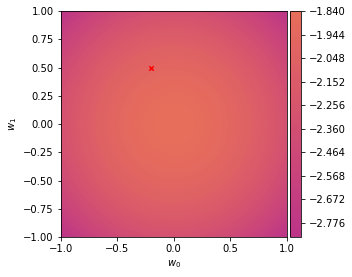

In [6]:
n = 0  # n=0 means posterior == prior
plot_type = "contour"
visualize_log_posterior(
    model=blr,
    x=x[:n],   # pick the first n data points
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

### Visualize the Prior Density: Hypothesis Space
We can visualize the same information also in hypothesis space. To this end, we discretize the weight space using a $7 \times 7$ grid, i.e., we have $7$ values for the bias $w_0$ and $7$ values for the slope $w_1$. Then we plot the corresponding model hypothesis (black) and express the prior density of the corresponding hypothesis using the line width. The red line is the ground truth.

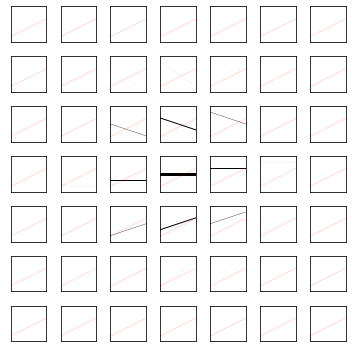

In [7]:
n = 0
plot_type = "hypotheses"
visualize_log_posterior(
    model=blr,
    x=x[:n],  # pick the first n data points
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

Note that small weights and biases are favoured by the prior.

### Visualize the Prior Predictive Distribution
A third way to visualize the prior is to plot the predictive distribution with $n=0$ data points.

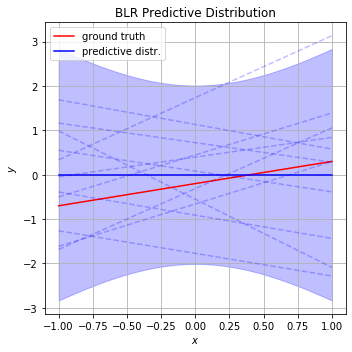

In [8]:
n = 0
visualize_predictive_distribution(
    model=blr,
    x=x[:n],  # pick the first n data points
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
)

### Visualize the Log Likelihood
We can use the same plots to visualize the log likelihood. First, lets have a look at the contours for one single data point.

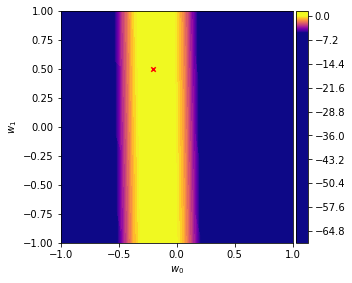

In [9]:
n = 1  # visualize the likelihood w.r.t. the n-th data point
plot_type = "contour"
visualize_log_likelihood(
    model=blr,
    x=x[n-1:n],  # only pick n-th data point
    y=y[n-1:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

Let us make sense of this. First, what was the value of $x$ and $y$ in this plot?

In [10]:
print(f"x = {x[n-1:n]}, y = {y[n-1:n]}")


x = [[0.01345202]], y = [[-0.16747533]]


Thus, the plot indeed makes sense, because it is likely to be generated by straight lines with a bias close to $y \approx -0.17$, independent of the slope (as $x \approx 0.0$).

It is easier to grasp this in hypothesis space, so let's plot the likelihood in hypotheses space!

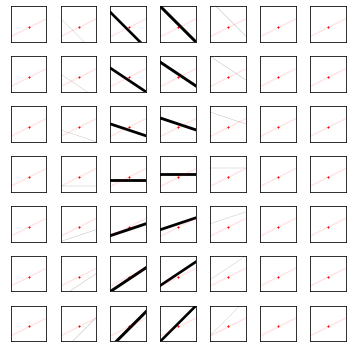

In [11]:
n = 1  # visualize the likelihood w.r.t. the n-th data point
plot_type = "hypotheses"
visualize_log_likelihood(
    model=blr,
    x=x[n-1:n],  # only pick n-th data point
    y=y[n-1:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

We observe that hypotheses which are compatible with the data point (red cross) have high likelihood (thick lines).

### Visualizing the Posterior Density
Recall that the posterior is the likelihood times the prior (+ normalization). Lets have a look at it using the plots we introduced above. First let us plot the prior again.

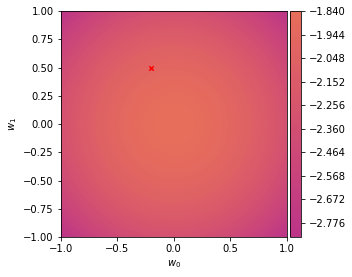

In [12]:
# plot the prior again
n = 1  # plot posterior w.r.t. the first n-1 datapoints (i.e., plot prior for n=1)
plot_type = "contour"
visualize_log_posterior(
    model=blr,
    x=x[:n-1],  # pick the first n-1 data points
    y=y[:n-1],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

And the likelihood again:

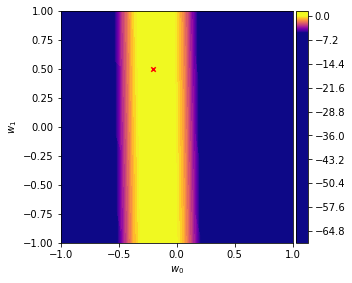

In [13]:
# plot the likelihood again
n = 1  # visualize likelihood w.r.t. the first data point
plot_type = "contour"
visualize_log_likelihood(
    model=blr,
    x=x[n-1:n],
    y=y[n-1:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

And now the posterior:

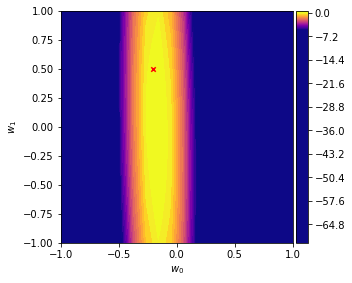

In [14]:
# plot the posterior
n = 1  # the plot the posterior we pick the first n datapoints
plot_type = "contour"
visualize_log_posterior(
    model=blr,
    x=x[:n],  # now we pick the first n datapoints
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

We observe that the posterior shows us which weights are compatible with both the prior and the likelihood! In our example, the likelihood is way "stronger" than the prior, s.t., the posterior looks very similar to the likelihood. Below, we will have a look at situations with "stronger" prior, namely when we start with n > 1!

Let's repeat that in hypothesis space! Prior:

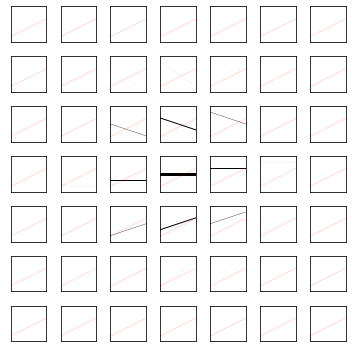

In [15]:
n = 0
plot_type = "hypotheses"
visualize_log_posterior(
    model=blr,
    x=x[:n],
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

Likelihood:

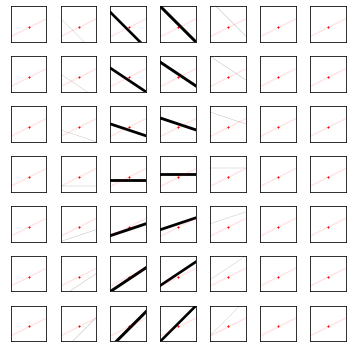

In [16]:
n = 1  # visualize the first data point
plot_type = "hypotheses"
visualize_log_likelihood(
    model=blr,
    x=x[n-1:n],
    y=y[n-1:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

Posterior:

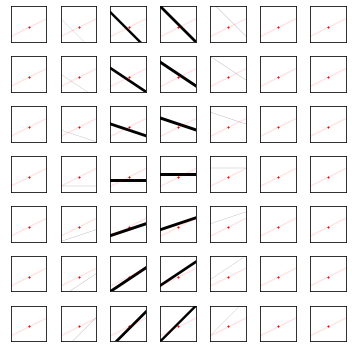

In [17]:
n = 1
plot_type = "hypotheses"
visualize_log_posterior(
    model=blr,
    x=x[:n],
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)


Finally, let us look at the predictive distribution:

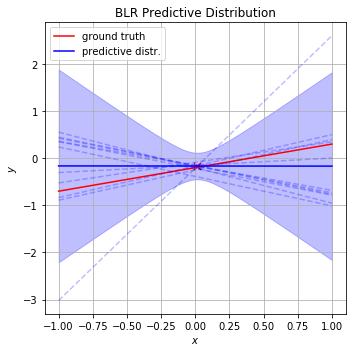

In [18]:
n = 1 
visualize_predictive_distribution(
    model=blr,
    x=x[:n],
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
)

### Let's play around a bit
We now plot prior - likelihood - posterior for various values of $n$. Just evaluate the cell below and adjust the plot type as well as the value of $n$. Note that for $n>1$, the prior (i.e., the previous posterior) is much "stronger" than the prior before we have seen any data.

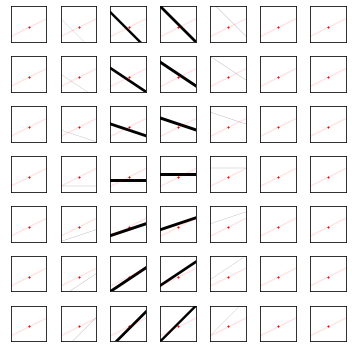

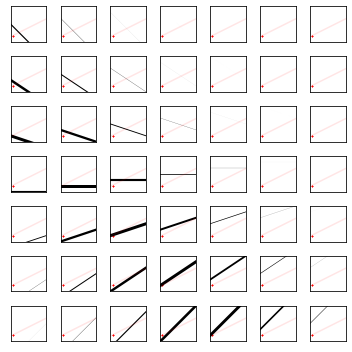

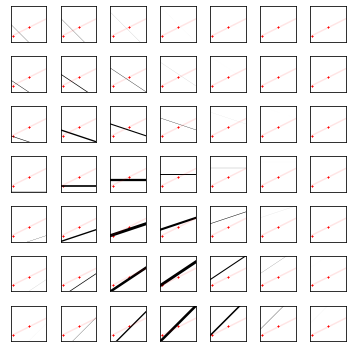

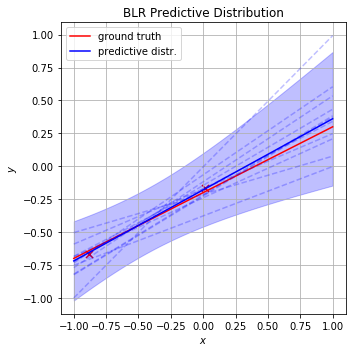

In [19]:
n = 2
assert n >= 1
assert n <= 32
# plot_type = "contour"
plot_type = "hypotheses"

# prior (= posterior for n-1)
visualize_log_posterior(
    model=blr,
    x=x[:n-1],
    y=y[:n-1],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

# likleihood for n-th data point 
visualize_log_likelihood(
    model=blr,
    x=x[n-1:n],
    y=y[n-1:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

# posterior
visualize_log_posterior(
    model=blr,
    x=x[:n],
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
    plot_type=plot_type
)

# predictive distribution
visualize_predictive_distribution(
    model=blr,
    x=x[:n],
    y=y[:n],
    w_true=np.array([w0_true, w1_true]),
)